In [13]:
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
import math
import sqlalchemy
from sqlalchemy.orm import sessionmaker
import requests
import sqlite3
import json


CLIENT_ID = "a29e1acdc35549448a61bf0948282b5d"
CLIENT_PRIVATE_KEY = "0f75a36819744589a057f0330a1b0a56"
redirect_uri ='https://www.google.com/'

scope = "user-top-read"

oauth_object = spotipy.SpotifyOAuth(client_id=CLIENT_ID,
                                    client_secret=CLIENT_PRIVATE_KEY,
                                    redirect_uri=redirect_uri,
                                    scope=scope)

token_dict = oauth_object.get_access_token()
token = token_dict['access_token']

spotify_object = spotipy.Spotify(auth=token)

top_tracks = spotify_object.current_user_top_tracks(limit=50)

C:\Users\difeg\AppData\Local\Temp\ipykernel_20320\943063693.py:23: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_dict = oauth_object.get_access_token()


In [6]:
top_tracks_df = pd.json_normalize(top_tracks['items'])

column_list = ['id','name','album.name','artists','popularity','album.total_tracks','album.release_date']

top_tracks_df = top_tracks_df[column_list]

top_tracks_df['artists'] = top_tracks_df.artists.str[0].str['name']

column_names = {
    'id':'id',
    'artists':'artists',
    'name':'track_name',
    'popularity':'popularity',
    'album.name':'album',
    'album.total_tracks':'total_tracks_in_album',
    'album.release_date':'album_release'
}

top_tracks_df = top_tracks_df.rename(columns=column_names)
top_tracks_df['album_release'] = pd.to_datetime(top_tracks_df['album_release'],format='%Y-%m-%d')

In [7]:
#Lets requets the information about each track in our dataframe
ids_list = list(top_tracks_df['id'])
url_complement = ','.join(ids_list)

new_token = "BQDcCwC6CdkD2H_23UdPT25DRKYSk6v6ZtJ4WGMSuFwjmK_htZTEGwhgiX5sre-mHSV2AOJ1oC-s13hznH6yvAFsgkrXMta657mSInBgHuOcbcvKR1zphqBQrNtanaIGdtPtey9_I3I0VeeP-gz6nIl12h8-cEj9UQwB5n-aHDhRsfDs5wp_"

headers = {
    "Accept" : "application/json",
    "Content-Type":"application/json",
    "Authorization":"Bearer {token}".format(token=new_token)
}

new_request = requests.get(f"https://api.spotify.com/v1/audio-features?ids="+url_complement,headers=headers)
new_request_data = new_request.json()

In [8]:
tracks_info_df = pd.json_normalize(new_request_data['audio_features'])
column_list_remove = ['type','uri','track_href','analysis_url','time_signature']
tracks_info_df = tracks_info_df.drop(column_list_remove,axis='columns')
tracks_info_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'duration_ms'],
      dtype='object')

In [9]:
top_tracks_data = top_tracks_df.merge(tracks_info_df,how='inner',on='id',left_index=False,right_index=False)
top_tracks_data.info()
top_tracks_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     50 non-null     object        
 1   track_name             50 non-null     object        
 2   album                  50 non-null     object        
 3   artists                50 non-null     object        
 4   popularity             50 non-null     int64         
 5   total_tracks_in_album  50 non-null     int64         
 6   album_release          50 non-null     datetime64[ns]
 7   danceability           50 non-null     float64       
 8   energy                 50 non-null     float64       
 9   key                    50 non-null     int64         
 10  loudness               50 non-null     float64       
 11  mode                   50 non-null     int64         
 12  speechiness            50 non-null     float64       
 13  acousti

,id,track_name,album,artists,popularity,total_tracks_in_album,album_release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,347H4auwVHcnWIsiYlVGWO,The Stars of Track & Field,If You're Feeling Sinister,Belle and Sebastian,36,10,1996-11-18,0.444,0.3150,11,-14.393,1,0.0485,0.224000,0.000061,0.3580,0.378,120.663,288573
1,38TpUKiHQZyBKiD9LMMy6X,Beautiful Stranger,Everything I Know About Love,Laufey,59,13,2022-08-26,0.609,0.2310,1,-12.348,1,0.0375,0.898000,0.000056,0.3160,0.354,84.007,201267
2,6cx5CvFhqN19efStehJqoW,Valentine,Everything I Know About Love,Laufey,72,13,2022-08-26,0.472,0.2040,3,-13.065,1,0.0452,0.917000,0.000000,0.1070,0.224,82.510,168907
3,3l7NAes5qqZu1KuugXUkWE,Pet Carrot,Bent Nail,Palehound,38,6,2013-10-22,0.602,0.5790,0,-6.626,1,0.0423,0.411000,0.004110,0.0982,0.405,157.679,144000
4,5zZ0lqZGOlNUcB4oACSjFM,Seeing Other People,If You're Feeling Sinister,Belle and Sebastian,38,10,1996-11-18,0.389,0.6200,1,-11.332,1,0.0349,0.592000,0.003740,0.1290,0.533,149.008,228027
5,5pHNCZCt3daiBXs1lWopBS,Little Eyes,Summer Sun,Yo La Tengo,35,13,2003-04-08,0.540,0.7460,0,-7.793,1,0.0313,0.580000,0.062000,0.0766,0.695,140.189,262480
6,3GWZX3YtldXCdSQqrzGgV5,Vesuvius,The Age of Adz,Sufjan Stevens,39,11,2010-10-12,0.527,0.4370,5,-11.761,1,0.0344,0.815000,0.001680,0.0969,0.358,114.034,328013
7,0BgPrNelWyvk0C5recZeKE,Sick Beat,Intro Bonito,Kero Kero Bonito,42,15,2014-08-25,0.747,0.6830,7,-6.353,1,0.1160,0.156000,0.000000,0.1820,0.845,98.973,179091
8,6pKuJwQJH7ZoYIqBFIOUGD,Shadows,I Can Hear The Heart Beating As One,Yo La Tengo,38,16,1997-04-22,0.664,0.2700,2,-16.686,1,0.0336,0.904000,0.019500,0.1140,0.177,114.827,147040
9,1yJ5YFWOaYWf6d71ZyzD5r,If You're Feeling Sinister,If You're Feeling Sinister,Belle and Sebastian,36,10,1996-11-18,0.580,0.3860,6,-13.364,1,0.0483,0.397000,0.000039,0.3890,0.582,129.738,321200


In [10]:
top_tracks_data_sophia = pd.read_csv('Data/sophi_music.csv')
top_tracks_data_sophia

,id,track_name,album,artists,popularity,total_tracks_in_album,album_release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2cGxRwrMyEAp8dEbuZaVv6,Instant Crush (feat. Julian Casablancas),Random Access Memories,Daft Punk,75,13,2013-05-17,0.775,0.585,10,-9.516,0,0.0271,0.042200,0.619000,0.0770,0.5180,109.942,337560
1,7Bxv0WL7UC6WwQpk9TzdMJ,Within,Random Access Memories,Daft Punk,59,13,2013-05-17,0.702,0.297,10,-14.116,0,0.0317,0.894000,0.485000,0.1030,0.0676,110.116,228507
2,11OwAR3GlBj9E35Cznf7Lj,Vulnerable,Rare,Selena Gomez,56,13,2020-01-10,0.695,0.573,10,-8.882,1,0.1670,0.132000,0.000137,0.1560,0.3800,100.031,192172
3,0yLdNVWF3Srea0uzk55zFn,Flowers,Flowers,Miley Cyrus,100,1,2023-01-13,0.707,0.681,0,-4.325,1,0.0668,0.063200,0.000005,0.0322,0.6460,117.999,200455
4,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Soundtrack ...,Post Malone,81,13,2018-12-14,0.760,0.479,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.9130,89.911,158040
5,4l0Mvzj72xxOpRrp6h8nHi,Lose You To Love Me,Rare,Selena Gomez,81,13,2020-01-10,0.488,0.343,4,-8.985,1,0.0436,0.556000,0.000000,0.2100,0.0978,102.819,206459
6,4JyGEgUGVkiszOv2caAYlm,Isn't It A Pity,On Fire,Galaxie 500,33,13,1989-09-01,0.276,0.615,9,-7.249,0,0.0303,0.357000,0.878000,0.1540,0.3360,83.414,314360
7,7x46YkKAwp3yZpaa72n5Mu,Stubborn Love,The Lumineers (Deluxe Edition),The Lumineers,66,16,2012-01-01,0.596,0.544,0,-11.759,1,0.0362,0.604000,0.017000,0.2620,0.2620,115.022,279000
8,2rtGaCAeYtmcIvuZsvgTf6,How to Disappear Completely,Kid A,Radiohead,66,11,2000-10-02,0.167,0.302,6,-11.644,0,0.0345,0.316000,0.797000,0.1100,0.1900,102.026,356333
9,73jVPicY2G9YHmzgjk69ae,Robbers,The 1975,The 1975,72,16,2013-01-01,0.621,0.692,4,-6.858,1,0.0291,0.000363,0.000017,0.3350,0.3810,99.806,254510


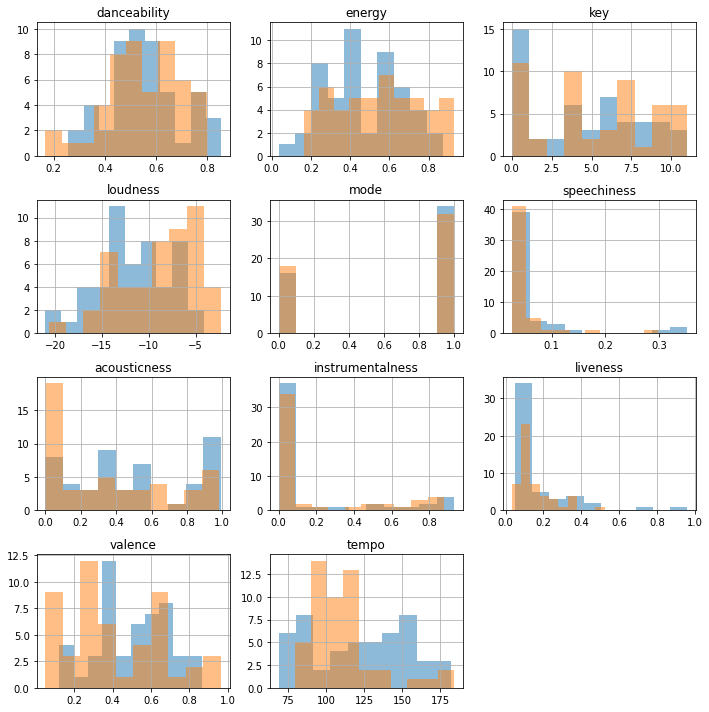

In [11]:
def draw_histograms(df: pd.DataFrame,df_s:pd.DataFrame):
    fig=plt.figure()
    n_rows = math.ceil(len(df.columns)/3)
    for i, var_name in enumerate(df.columns):
        ax=fig.add_subplot(n_rows,3,i+1)
        df[var_name].hist(bins=10,ax=ax,figsize=(10,10),alpha=0.5)
        df_s[var_name].hist(bins=10,ax=ax,figsize=(10,10),alpha=0.5)
        ax.set_title(var_name)
    #plt.figsize(5,5)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(top_tracks_data.iloc[:,7:-1],top_tracks_data_sophia.iloc[:,7:-1])

In [19]:
DATABASE_LOCATION = "sqlite:///my_top_played_tracks.sqlite"

engine = sqlalchemy.create_engine(DATABASE_LOCATION)
conn = sqlite3.connect('my_top_played_tracks.sqlite')
cursor = conn.cursor()
top_tracks_data.to_sql('my_top_played_tracks',engine,index=False, if_exists='append')
top_tracks_data_sophia.to_sql('my_top_played_tracks_sophia',engine,index=False, if_exists='append')
conn.close()
print("Close database successfully ")

Close database successfully 
